## Notebook Summary

Apply oversampling techniques (from the imblearn library) to the minority class in order to address the class imbalance in the datasets. 

Data augmentation techniques (such as SMOTE) can be used to synthesize new examples from the existing examples and create a more enriched dataset. Augmentation is often preferred to simply duplicating examples in the minority class as duplicating does not add any new information to the model.

### Techniques
- **SMOTE**: Synthetic Minority Oversampling TEchnique, or SMOTE is perhaps the most widely used approach to synthesizing new examples. A random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.


- **Borderline SMOTE**: A variant of the original SMOTE algorithm. Borderline samples are be detected (using nearest neighbor methods) and used to generate new synthetic samples. There are two kinds of Borderline-SMOTE. Borderline-SMOTE1 also oversampls the majority class where the majority data are causing misclassification at the decision boundary, while Borderline-SMOTE2 only oversampls the minority classes.


- **SVM SMOTE**: A variant of Borderline-SMOTE; Instead of using K-nearest neighbors, SVM SMOTE (or Borderline SVM-SMOTE) uses SVM to identify the misclassification at the class boundary. Borderline-SMOTE SVM focuses more on the separation boudaries on both sides of the separation gap, while Borderline-SMOTE focuses on the class boundary.


- **ADASYN**: Adaptive Synthetic Sampling (ADASYN) takes a different approach compared with the SMOTE algorithms. The synthetic data generation is inversely proportional to the density of the minority class. Synthetic data are created in regions of the feature space where the density of minority examples is low, and fewer or none where the density is high.



ADASYN and SMOTE algorithms that focus on border or decision boundary regions are prone to outliers as often time low-density and boundary region data can be outliers. 


Oversampling can be used to create as many synthetic examples for the minority class as are required. It is recommended to first use random under-sampling to trim the number of examples in the majority class, then use SMOTE to oversample the minority class to balance the class distribution. 

A general downside of all these techniques is that synthetic examples are created without considering the majority class, possibly resulting in ambiguous examples if there is a strong overlap for the classes.

## Settings

### Python Packages

In [1]:
import os
import sys

import pandas as pd
import numpy as np
from collections import Counter

from imblearn import under_sampling as usamp
from imblearn import over_sampling as osamp

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Custom Modules

In [2]:
sys.path.append("/Users/susmitadatta/DS/Projects/Kaggle/CreditFraudDetection/Codebase") 
import config as _config

### Parameters and Vaiables

### Load Data

In [3]:
path = os.path.join(_config.DATA_DIR, 'ETL')
filename = 'creditcard.csv'

df_input = pd.read_csv( os.path.join(path, filename)).drop_duplicates()

In [4]:
df_input_0 = df_input[ df_input['Class']==0 ]
df_input_1 = df_input[ df_input['Class']==1 ]

In [5]:
target = 'Class'
features = df_input.columns.tolist()
features.remove(target)

## Oversampling Techniques
- Synthetic Minority Oversampling TEchnique (SMOTE)
- Borderline SMOTE
- Support Vector Machine SMOTE (SVM-SMOTE)
- Adaptive Synthetic Sampling (ADASYN)

### SMOTE

In [6]:
X, y = df_input[features].values, df_input[[target]].values


smote = osamp.SMOTE(sampling_strategy=0.25, k_neighbors=10, random_state=999)
X_samp, y_samp = smote.fit_resample(X, y)

Counter(y_samp), Counter((y.flatten()))

(Counter({0: 283253, 1: 70813}), Counter({0: 283253, 1: 473}))

In [7]:
df_X = pd.DataFrame(X_samp, columns=features)
df_y = pd.DataFrame(y_samp, columns=['Class'])

df = pd.concat([df_X, df_y], axis=1)

df_0 = df[df['Class']==0]
df_1 = df[df['Class']==1]

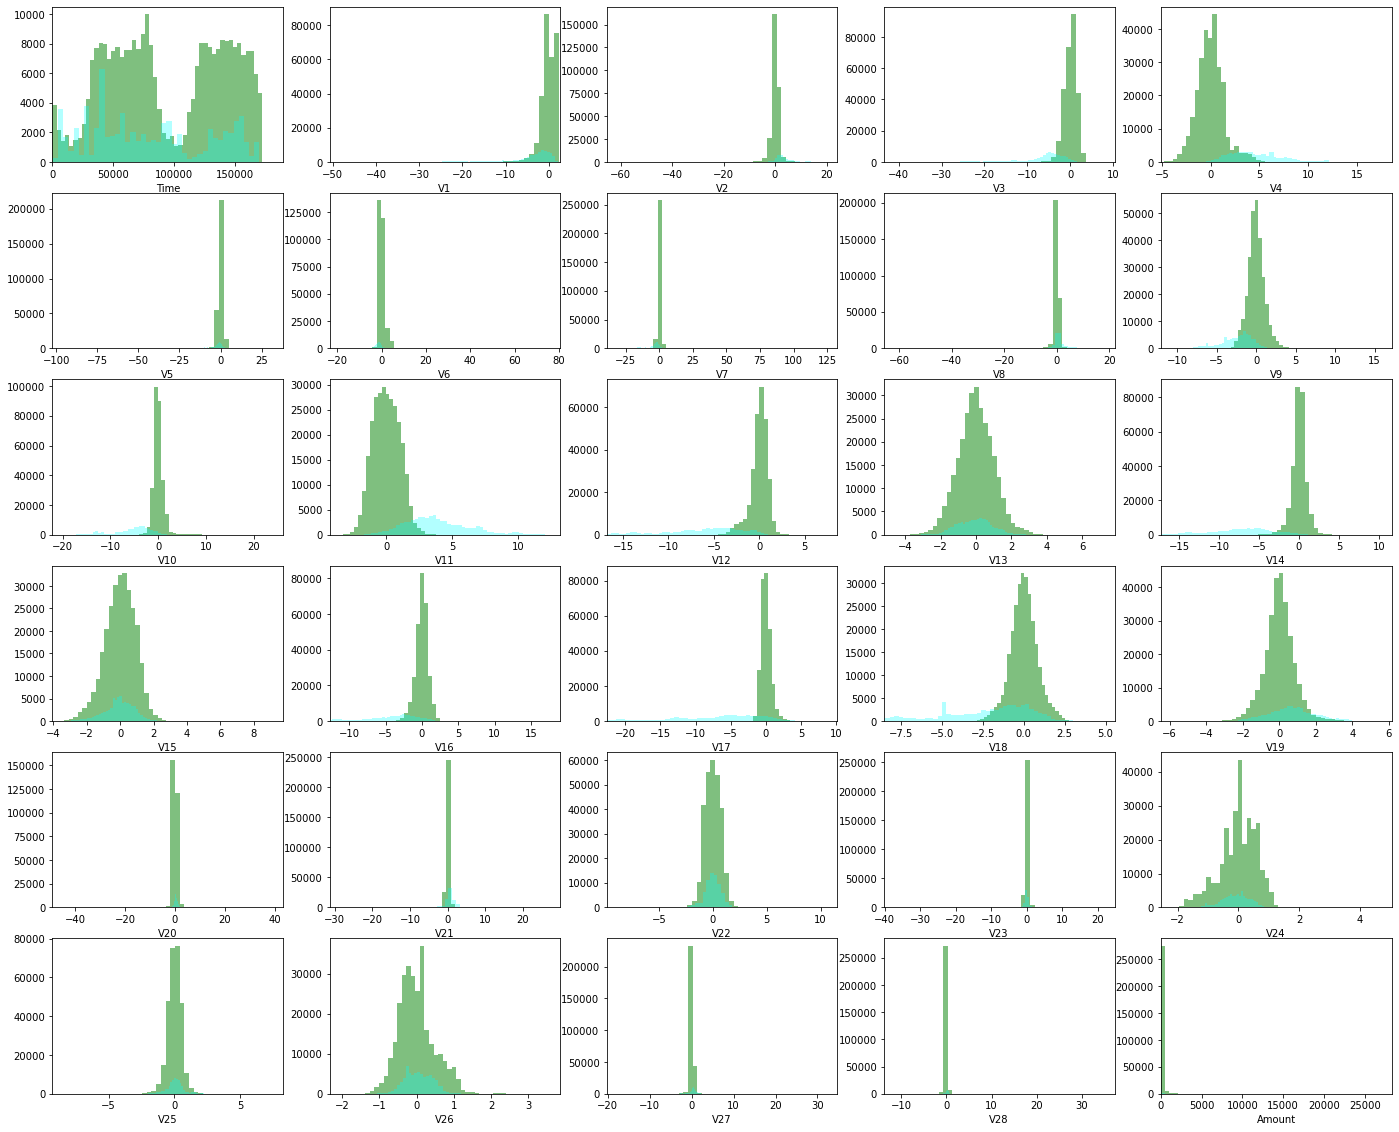

In [8]:
nrow = 6
ncol = 5
fig, ax = plt.subplots(nrow, ncol, figsize=(nrow*4, ncol*4))


r, c = 0, 0
for feat in features:
    
    feat0 = df_0[feat]
    feat1 = df_1[feat]
    
    sns.distplot(feat0, kde=False, color="green", ax=ax[r, c], hist_kws=dict(alpha=0.5))
    sns.distplot(feat1, kde=False, color="cyan", ax=ax[r, c], hist_kws=dict(alpha=0.3))
    
    ax[r, c].set_xlim(df_input[feat].min()*0.9, df_input[feat].max()*1.1)
    
    if c == ncol-1:
        c = 0
        r = r+1
    else:
        c = c+1

### Borderline-SMOTE

In [9]:
X, y = df_input[features].values, df_input[[target]].values

bsmote = osamp.BorderlineSMOTE(sampling_strategy=0.25, k_neighbors=10, kind = 'borderline-1', random_state=999)
X_samp, y_samp = smote.fit_resample(X, y)

Counter(y_samp), Counter((y.flatten()))

(Counter({0: 283253, 1: 70813}), Counter({0: 283253, 1: 473}))

In [10]:
df_X = pd.DataFrame(X_samp, columns=features)
df_y = pd.DataFrame(y_samp, columns=['Class'])

df = pd.concat([df_X, df_y], axis=1)

df_0 = df[df['Class']==0]
df_1 = df[df['Class']==1]

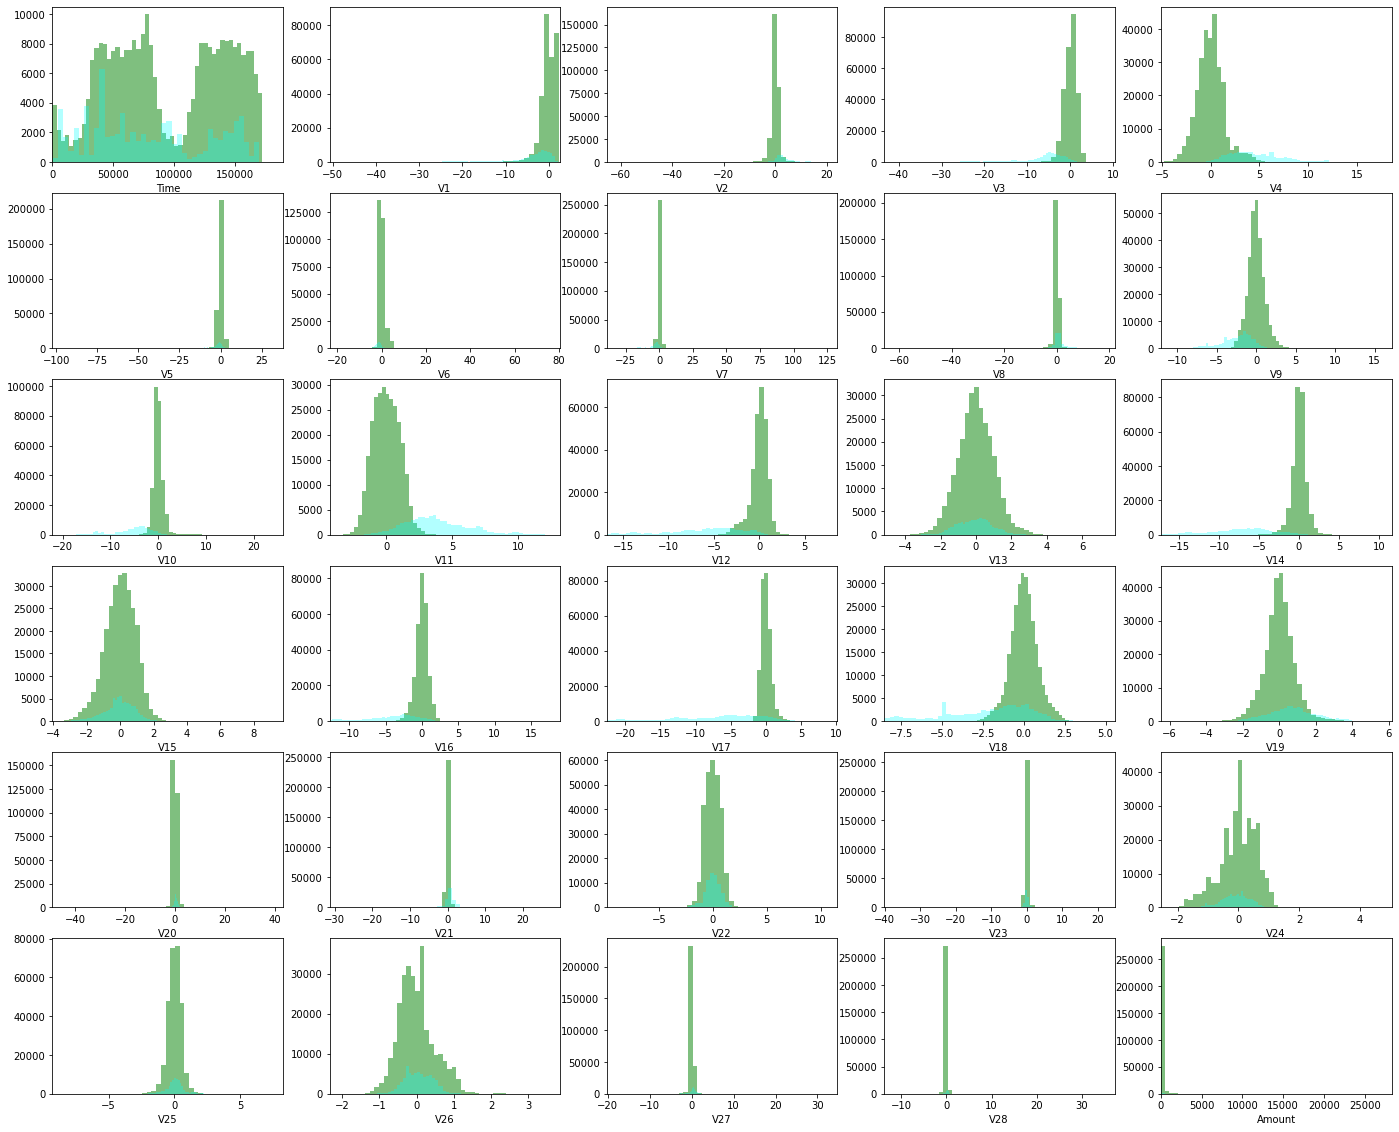

In [11]:
nrow = 6
ncol = 5
fig, ax = plt.subplots(nrow, ncol, figsize=(nrow*4, ncol*4))

r, c = 0, 0
for feat in features:
    
    feat0 = df_0[feat]
    feat1 = df_1[feat]
    
    sns.distplot(feat0, kde=False, color="green", ax=ax[r, c], hist_kws=dict(alpha=0.5))
    sns.distplot(feat1, kde=False, color="cyan", ax=ax[r, c], hist_kws=dict(alpha=0.3))
    
    ax[r, c].set_xlim(df_input[feat].min()*0.9, df_input[feat].max()*1.1)
    
    if c == ncol-1:
        c = 0
        r = r+1
    else:
        c = c+1

### SVM SMOTE

In [12]:
X, y = df_input[features].values, df_input[[target]].values

svmsmote = osamp.SVMSMOTE(sampling_strategy=0.25, random_state = 999)

X_samp, y_samp = smote.fit_resample(X, y)

Counter(y_samp), Counter((y.flatten()))

(Counter({0: 283253, 1: 70813}), Counter({0: 283253, 1: 473}))

In [13]:
df_X = pd.DataFrame(X_samp, columns=features)
df_y = pd.DataFrame(y_samp, columns=['Class'])

df = pd.concat([df_X, df_y], axis=1)

df_0 = df[df['Class']==0]
df_1 = df[df['Class']==1]

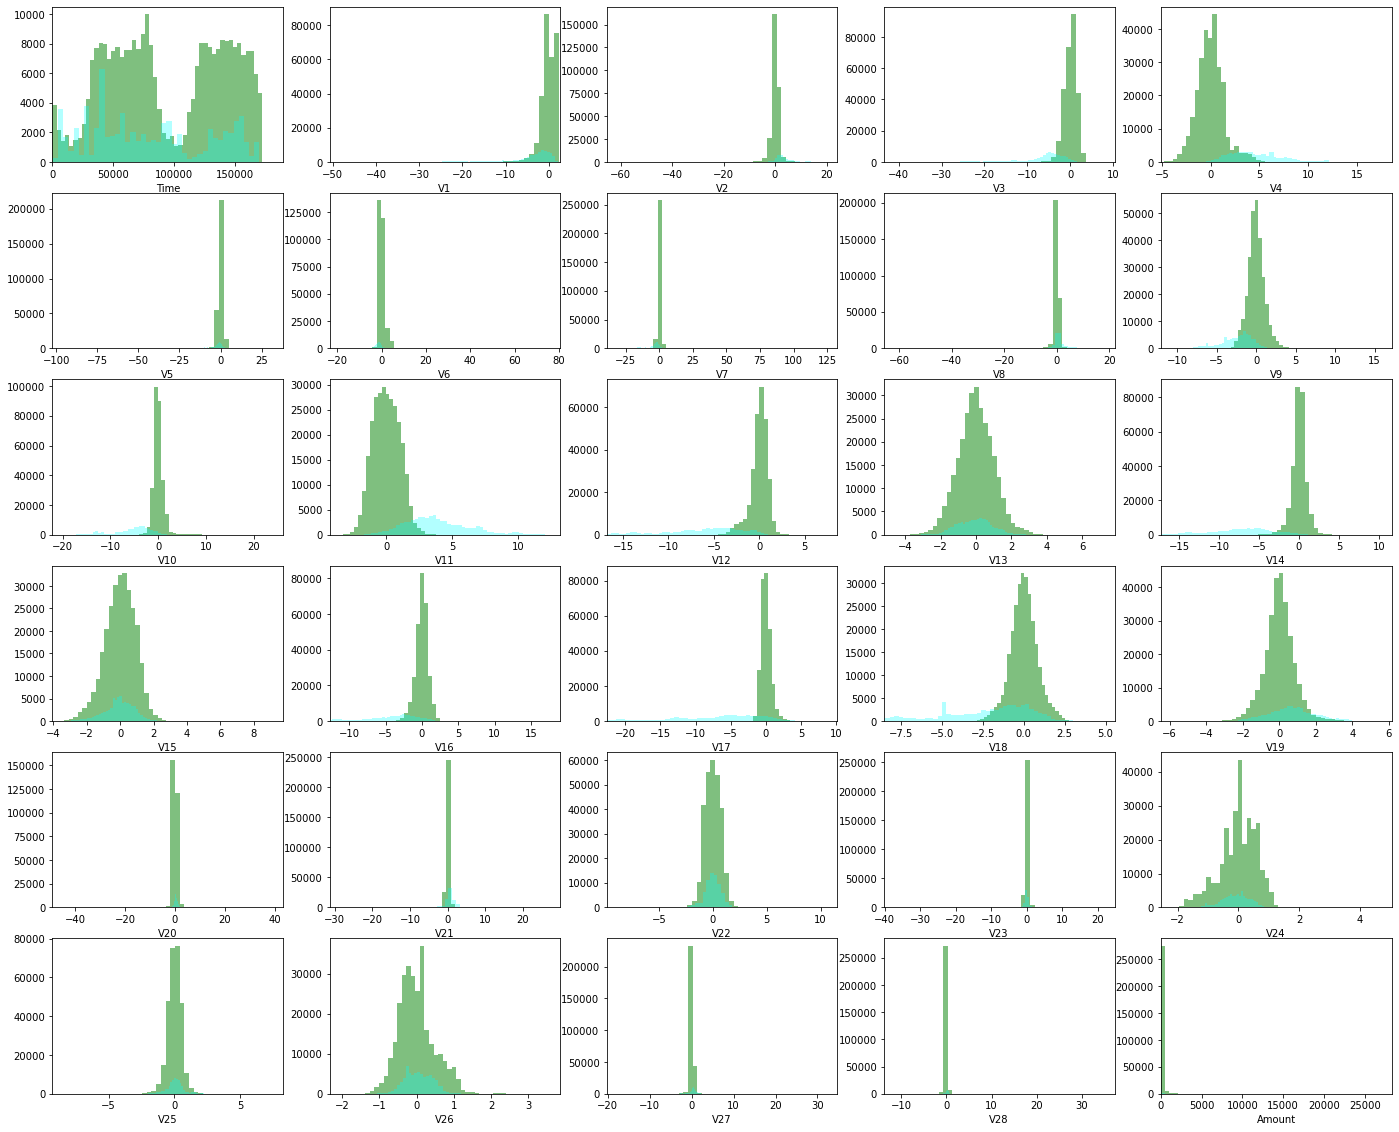

In [14]:
nrow = 6
ncol = 5
fig, ax = plt.subplots(nrow, ncol, figsize=(nrow*4, ncol*4))

r, c = 0, 0
for feat in features:
    
    feat0 = df_0[feat]
    feat1 = df_1[feat]
    
    sns.distplot(feat0, kde=False, color="green", ax=ax[r, c], hist_kws=dict(alpha=0.5))
    sns.distplot(feat1, kde=False, color="cyan", ax=ax[r, c], hist_kws=dict(alpha=0.3))
    
    ax[r, c].set_xlim(df_input[feat].min()*0.9, df_input[feat].max()*1.1)
    
    if c == ncol-1:
        c = 0
        r = r+1
    else:
        c = c+1

### ADASYN

In [15]:
X, y = df_input[features].values, df_input[[target]].values

adasyn = osamp.ADASYN(sampling_strategy=0.25, random_state = 999)

X_samp, y_samp = smote.fit_resample(X, y)

Counter(y_samp), Counter((y.flatten()))

(Counter({0: 283253, 1: 70813}), Counter({0: 283253, 1: 473}))

In [16]:
df_X = pd.DataFrame(X_samp, columns=features)
df_y = pd.DataFrame(y_samp, columns=['Class'])

df = pd.concat([df_X, df_y], axis=1)

df_0 = df[df['Class']==0]
df_1 = df[df['Class']==1]

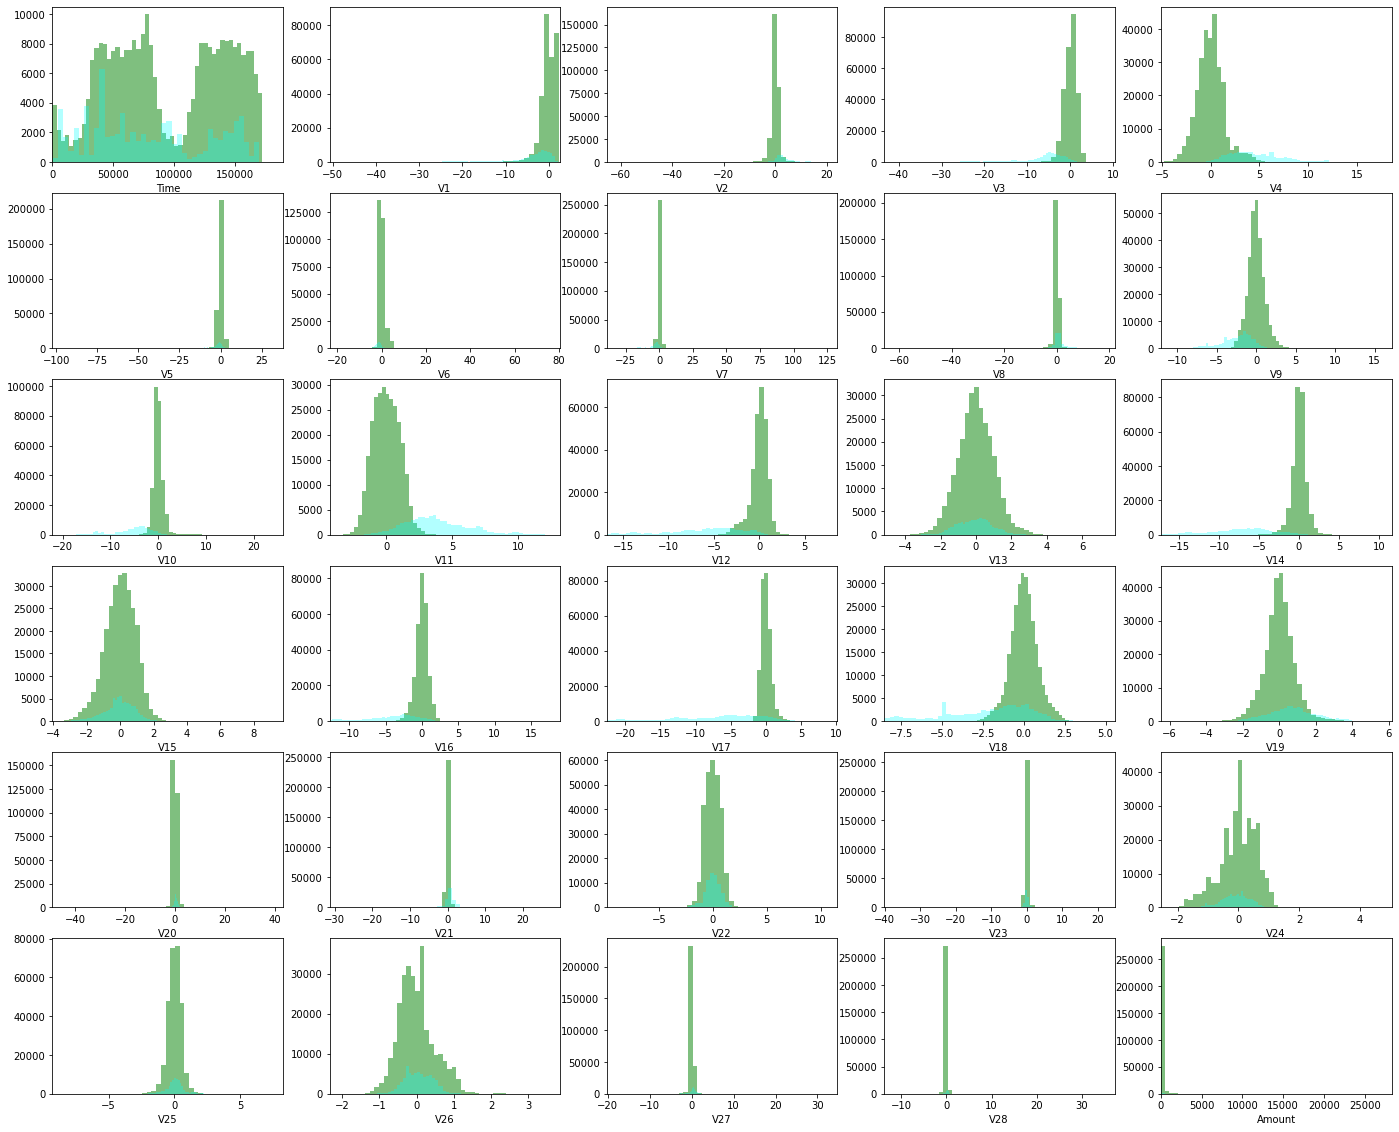

In [17]:
nrow = 6
ncol = 5
fig, ax = plt.subplots(nrow, ncol, figsize=(nrow*4, ncol*4))

r, c = 0, 0
for feat in features:
    
    feat0 = df_0[feat]
    feat1 = df_1[feat]
    
    sns.distplot(feat0, kde=False, color="green", ax=ax[r, c], hist_kws=dict(alpha=0.5))
    sns.distplot(feat1, kde=False, color="cyan", ax=ax[r, c], hist_kws=dict(alpha=0.3))
    
    ax[r, c].set_xlim(df_input[feat].min()*0.9, df_input[feat].max()*1.1)
    
    if c == ncol-1:
        c = 0
        r = r+1
    else:
        c = c+1